# Imports

In [1]:
# current filepath system leaves plenty to be desired
import sys
local_path = '/Users/hinzlehome/codeup-data-science/time-series-exercises'
sys.path.insert(0, local_path)

# imports.py in /utils/
from utils.imports import *

# plotting magic
%matplotlib inline
# plotting defaults
plt.rc('figure', figsize=(16, 9))
plt.style.use('seaborn-darkgrid')
plt.rc('font', size=16)
# plt.style.available
# ^^^ show available seaborn styles

# !!! Warning !!! 
# *** no more warnings ***
# import warnings
# warnings.filterwarnings("ignore")

# custom mods
from utils.tidy import *
from utils.model import *


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
train,validate,test=btcusd()

cached csv


In [3]:
train.head()

,open_time,open,high,low,close,volume,quote_asset,number_of_trades,taker_buy_base_asset_vol,taker_buy_quote_asset_vol
close_time,,,,,,,,,,
2022-04-25 03:34:59.999,1650857640000,39241.39,39247.11,39241.03,39241.03,0.034305,1346.2987,5,0.032395,1271.3484
2022-04-25 03:35:59.999,1650857700000,39239.88,39272.32,39239.88,39246.41,2.441750,95844.1921,65,1.473456,57836.1693
2022-04-25 03:36:59.999,1650857760000,39245.53,39249.18,39230.06,39232.18,0.103794,4072.9587,24,0.052915,2076.4194
2022-04-25 03:37:59.999,1650857820000,39233.21,39238.46,39232.93,39232.93,0.019871,779.6247,8,0.007287,285.9047
2022-04-25 03:38:59.999,1650857880000,39232.49,39248.38,39232.20,39238.10,0.056483,2216.3283,13,0.048939,1920.2979


# Making Modeling

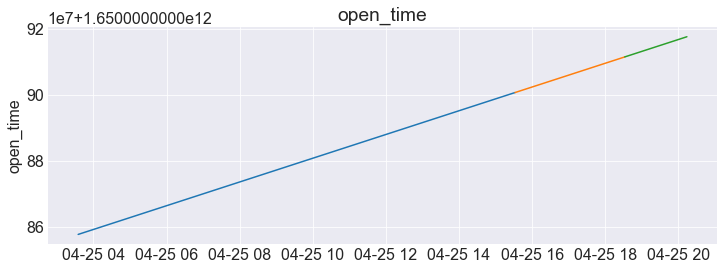

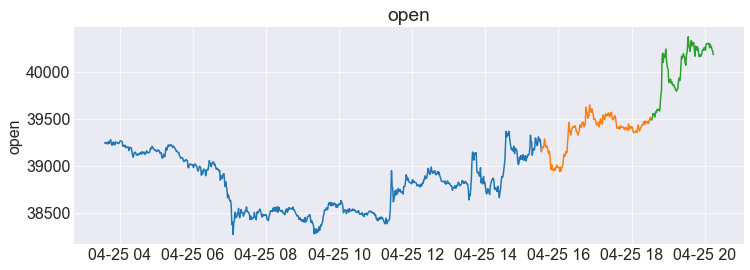

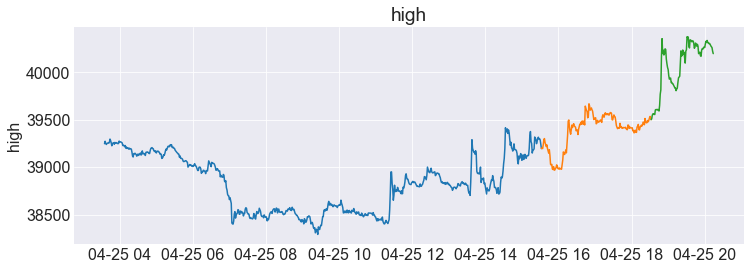

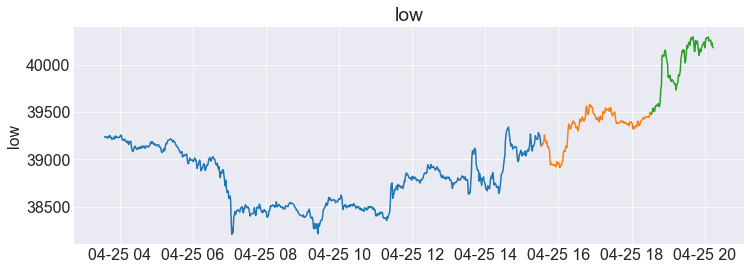

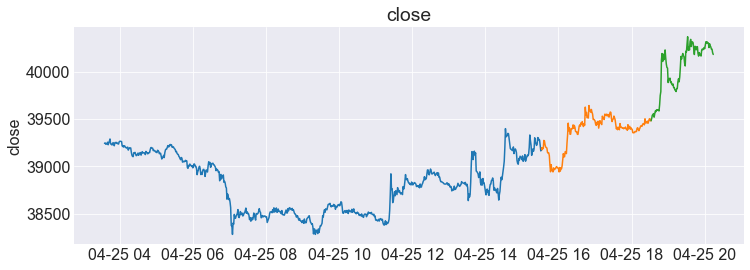

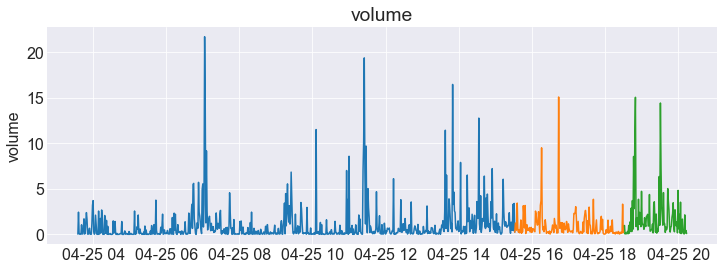

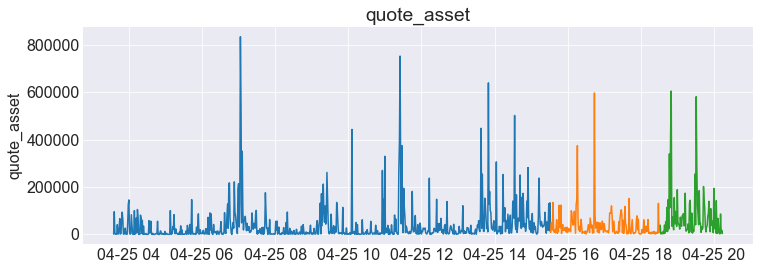

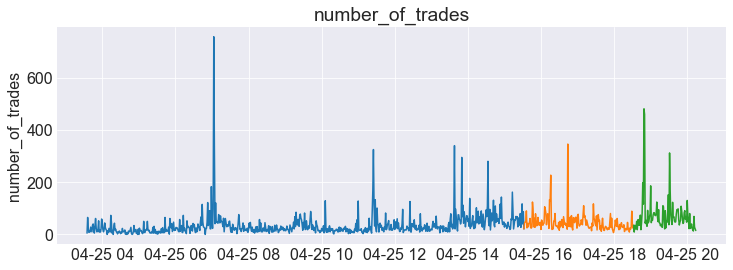

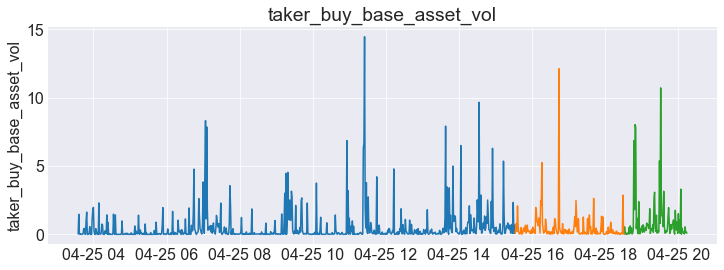

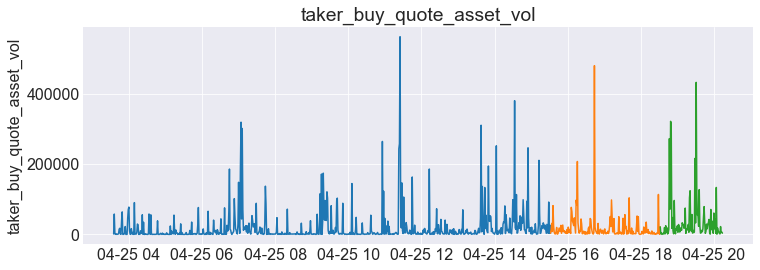

In [4]:
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

# Last Observed Value

In [5]:
lov = train['close'][-1:][0]


In [6]:
yhat_df = pd.DataFrame({'close': validate.close,'lov': [lov]},index = validate.index)
yhat_df.head(2)


,close,lov
close_time,,
2022-04-25 15:31:59.999,39195.35,39195.35
2022-04-25 15:32:59.999,39173.15,39195.35


# Simple Average

In [7]:
avg =round(train.close.mean(),3)

In [8]:
avg = pd.DataFrame({'avg': [avg]},index = validate.index)
yhat_df=pd.concat([yhat_df,avg],axis=1)

# Simple Moving Average

In [9]:
sma=talib.SMA(train.close,10)

In [10]:
sma=round(sma[-1],3)

In [11]:
sma = pd.DataFrame({'sma': [sma]},index = validate.index)
yhat_df=pd.concat([yhat_df,sma],axis=1)

# Holt's

In [12]:
model = Holt(train.close, exponential = True)


/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


In [13]:
model = model.fit(smoothing_level = .1, 
                    smoothing_slope = .1, 
                    optimized = False)


/var/folders/mk/w2hz4wxx7xn5hr_56wz536gh0000gn/T/ipykernel_8615/2622431960.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = model.fit(smoothing_level = .1,


In [14]:
yhat_items = model.predict(start = validate.index[0], 
                            end = validate.index[-1])

In [15]:
yhat_df['holt'] = round(yhat_items, 2)


In [16]:
yhat_df.head()

,close,lov,avg,sma,holt
close_time,,,,,
2022-04-25 15:31:59.999,39195.35,39195.35,38806.14,39242.007,39254.29
2022-04-25 15:32:59.999,39173.15,39195.35,38806.14,39242.007,39254.09
2022-04-25 15:33:59.999,39190.45,39195.35,38806.14,39242.007,39259.79
2022-04-25 15:34:59.999,39185.52,39195.35,38806.14,39242.007,39265.49
2022-04-25 15:35:59.999,39271.97,39195.35,38806.14,39242.007,39271.18


<AxesSubplot:xlabel='close_time', ylabel='close'>

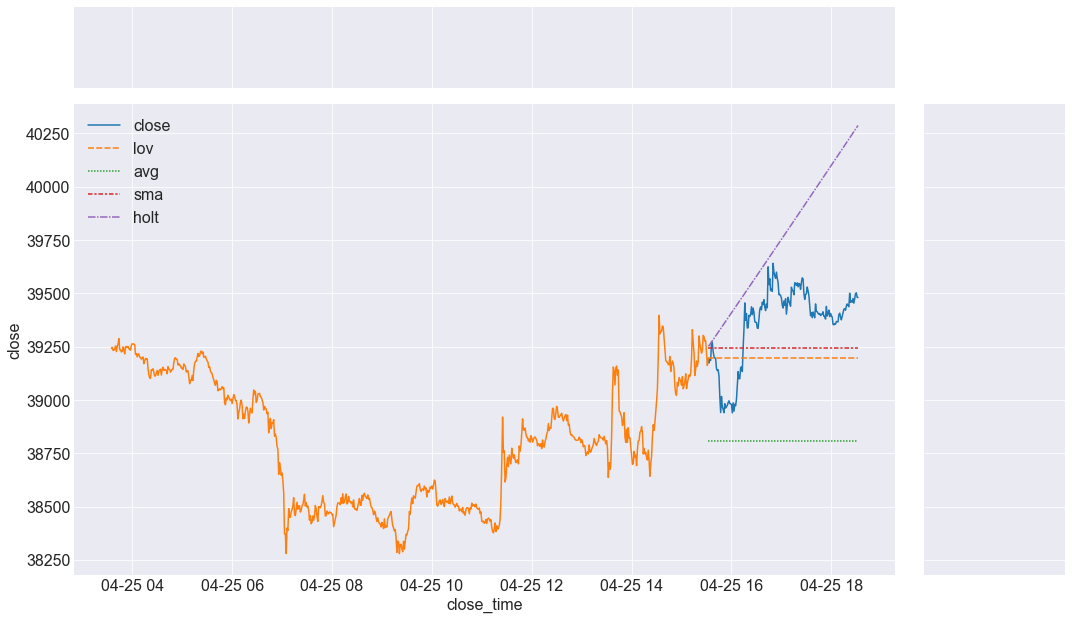

In [17]:
g = sns.JointGrid()
g.fig.set_figwidth(16)
g.fig.set_figheight(9)
sns.lineplot(data=yhat_df,ax=g.ax_joint)
sns.lineplot(data=train.close,ax=g.ax_joint)
#sns.kdeplot(yhat_df.close, linewidth=2, ax=g.ax_joint)



# RMSE

In [18]:
yhat_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 181 entries, 2022-04-25 15:31:59.999000 to 2022-04-25 18:31:59.999000
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   181 non-null    float64
 1   lov     181 non-null    float64
 2   avg     181 non-null    float64
 3   sma     181 non-null    float64
 4   holt    181 non-null    float64
dtypes: float64(5)
memory usage: 8.5 KB


In [19]:
eval_df=pd.DataFrame()

for col in yhat_df.columns:
	if col == 'close':
		print('skipping close')
		continue
	else:
		print(col)
		x=mean_squared_error(yhat_df.close,yhat_df[col],squared=False)
		eval_df=pd.concat([eval_df,pd.DataFrame({col:[x]})],axis=1)

skipping close
lov
avg
sma
holt


In [20]:
eval_df

,lov,avg,sma,holt
0,242.149605,581.652564,213.179082,468.632256


Text(0, 0.5, 'RMSE')

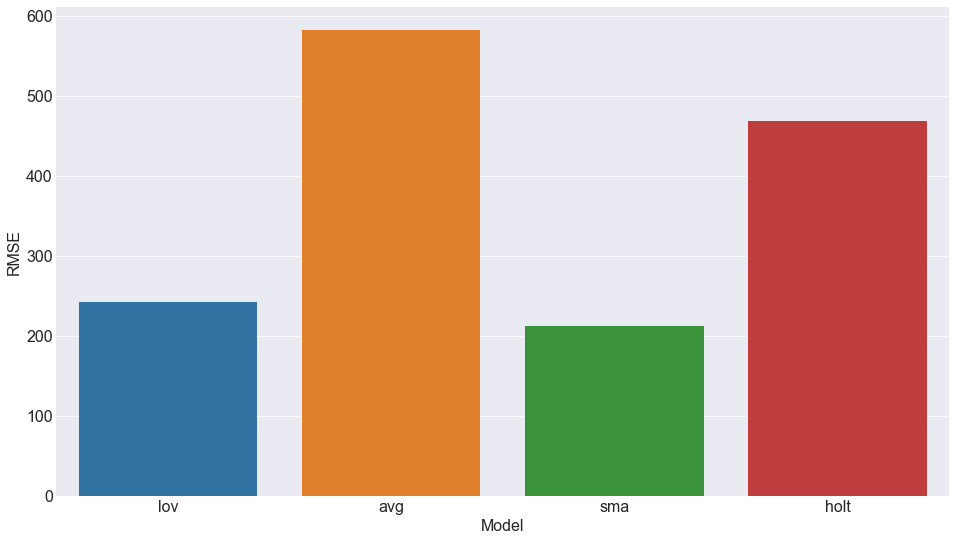

In [21]:
p=sns.barplot(data=eval_df)
p.set_xlabel('Model')
p.set_ylabel('RMSE')

# SMA for the WIN!!
